# Problem Statement: 
***Breast cancer (BC) is one of the most common cancers among women worldwide, representing the majority of new cancer cases and cancer-related deaths according to global statistics, making it a significant public health problem in today’s society. The early diagnosis of BC can improve the prognosis and chance of survival significantly, as it can promote timely clinical treatment to patients. ML techniques are being broadly used in the breast cancer classification problem. They provide high classification accuracy and effective diagnostic capabilities.***



In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**DATA IMPORTING**

In [48]:
data = pd.read_csv('C:/Users/athar/OneDrive/Documents/Data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [49]:
data.shape

(569, 33)

In [50]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

# DATA PREPROCESSING

In [51]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [52]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [53]:
data = data.drop(['Unnamed: 32','id'],axis = 1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [54]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

**MALIGNANT**(M) : At Risk  
**BENIGN**(B)    : Safe

# EXPLORATORY DATA  ANALYSIS 

<AxesSubplot:>

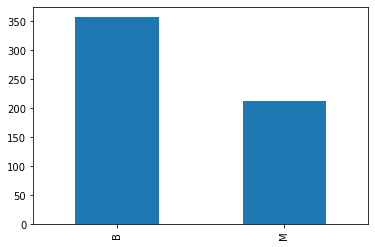

In [55]:
data['diagnosis'].value_counts().plot(kind = 'bar')

- **37%** of the people have status **Malignant**

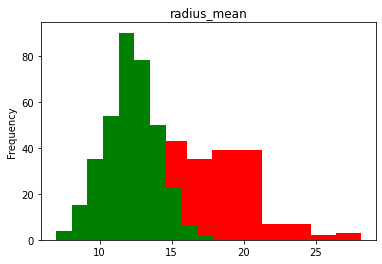

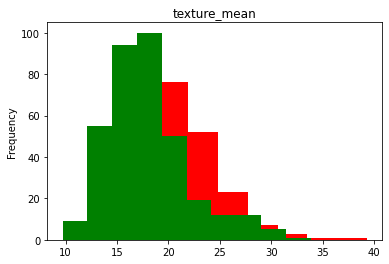

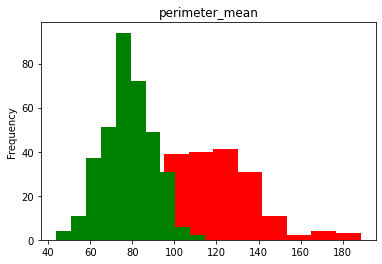

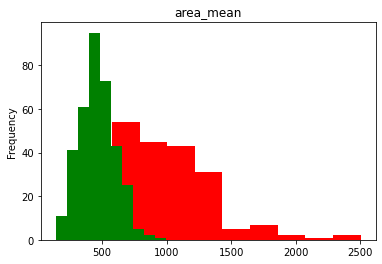

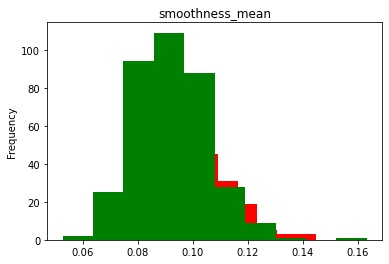

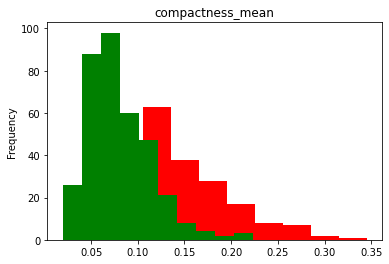

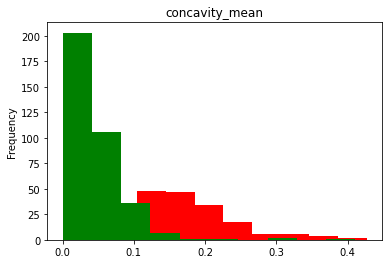

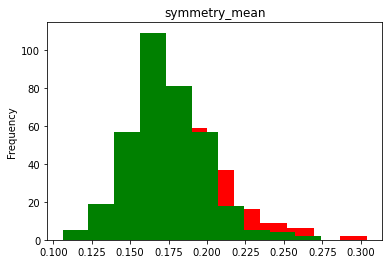

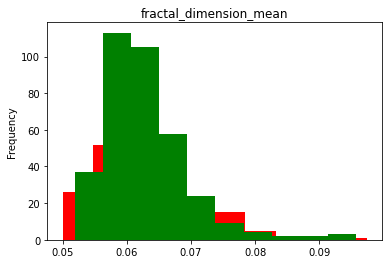

In [56]:
for i in ('radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 
               'concavity_mean','symmetry_mean','fractal_dimension_mean'):
    plt.figure()
    data[i][data['diagnosis']=='M'].plot.hist(color = 'red',title = i)
    data[i][data['diagnosis']=='B'].plot.hist(color = 'green')
    plt.show()

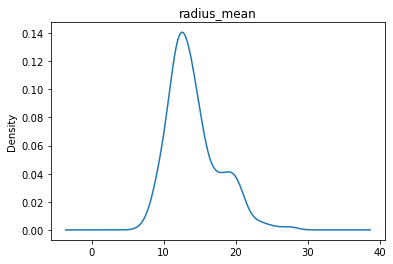

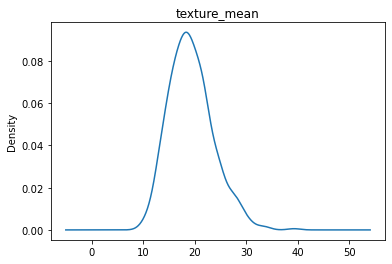

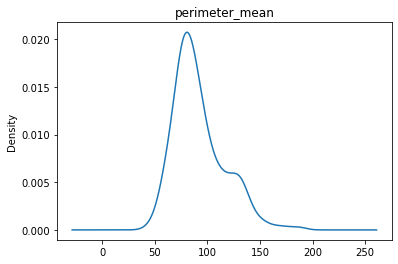

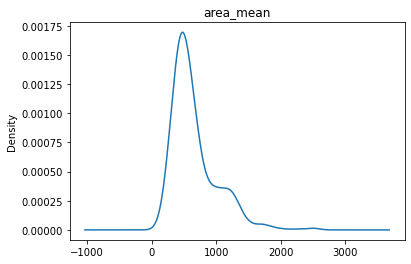

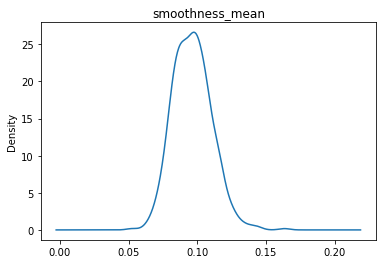

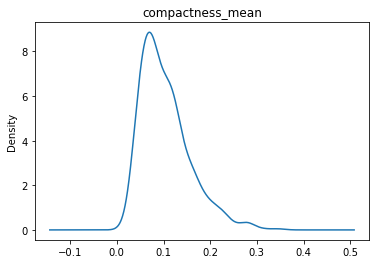

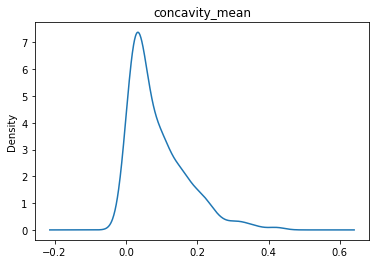

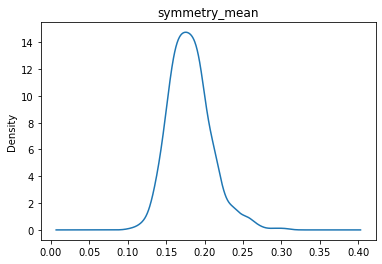

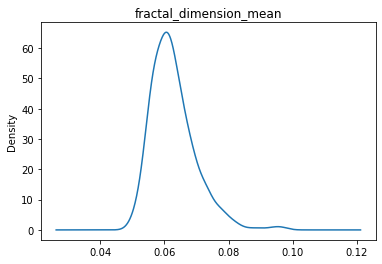

In [57]:
for i in ('radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 
               'concavity_mean','symmetry_mean','fractal_dimension_mean'):
    data[i].plot.kde(title = i)
    plt.show()

In [58]:
Data = data.drop(data.iloc[:,11:], axis =1)
Data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


***We have REMOVED the*** se ***and*** worst ***columns as*** mean is a already present. 

In [59]:
Data.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


<AxesSubplot:>

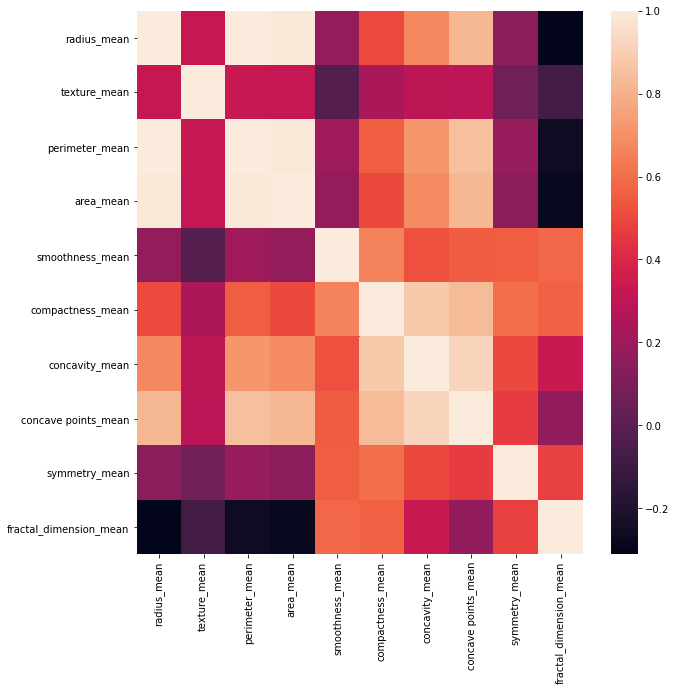

In [60]:
fig,ax =plt.subplots(figsize=(10,10))
sns.heatmap(Data.corr(),ax=ax)

*From the above **heatmap** we can observe the **correlation** between the features used to determine Breast Cancer.*

In [61]:
Data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [62]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


# Data Splitting

In [63]:
x = Data.iloc[:,1:].values

In [64]:
y = Data['diagnosis'].copy()

In [65]:
x.shape,y.shape

((569, 10), (569,))

In [66]:
y = y.map({'B':0,'M':1})

*Trying 5 models to get the **best** accuracy*

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
from sklearn.svm import SVC

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
from sklearn.naive_bayes import GaussianNB

*Splitting Dataset*

In [72]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, average_precision_score

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size = 0.25, random_state = 0)

In [74]:
LR_clf = LogisticRegression(random_state = 0)

In [75]:
DT_clf = DecisionTreeClassifier(random_state = 0)

In [76]:
SV_clf = SVC(random_state = 0)

In [77]:
RF_clf = RandomForestClassifier(random_state = 0)

In [78]:
NB_clf = GaussianNB()

In [79]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [80]:
LR={}
LR_clf.fit(x_train,y_train)
y_pred = LR_clf.predict(x_test)
LR['Accuracy_test'] = accuracy_score(y_test , y_pred)  
LR['Recall_test'] = recall_score(y_test , y_pred)
LR['Precision_test'] = precision_score(y_test , y_pred)
LR['F1_Score_test'] = f1_score(y_test , y_pred)

In [81]:
SVc={}
SV_clf.fit(x_train,y_train)
y_pred = SV_clf.predict(x_test)
SVc['Accuracy_test'] = accuracy_score(y_test , y_pred)  
SVc['Recall_test'] = recall_score(y_test , y_pred)
SVc['Precision_test'] = precision_score(y_test , y_pred)
SVc['F1_Score_test'] = f1_score(y_test , y_pred)

In [82]:
dt={}
DT_clf.fit(x_train,y_train)
y_pred = DT_clf.predict(x_test)
dt['Accuracy_test'] = accuracy_score(y_test , y_pred)  
dt['Recall_test'] = recall_score(y_test , y_pred)
dt['Precision_test'] = precision_score(y_test , y_pred)
dt['F1_Score_test'] = f1_score(y_test , y_pred)

In [83]:
rf={}
RF_clf.fit(x_train,y_train)
y_pred = RF_clf.predict(x_test)
rf['Accuracy_test'] = accuracy_score(y_test , y_pred)  
rf['Recall_test'] = recall_score(y_test , y_pred)
rf['Precision_test'] = precision_score(y_test , y_pred)
rf['F1_Score_test'] = f1_score(y_test , y_pred)

In [84]:
gnb={}
NB_clf.fit(x_train,y_train)
y_pred = NB_clf.predict(x_test)
gnb['Accuracy_test'] = accuracy_score(y_test , y_pred)  
gnb['Recall_test'] = recall_score(y_test , y_pred)
gnb['Precision_test'] = precision_score(y_test , y_pred)
gnb['F1_Score_test'] = f1_score(y_test , y_pred)

In [85]:
from collections import defaultdict
my_dict=[LR ,dt, SVc, rf, gnb]
predictors={}
for k in LR:
    predictors[k] = tuple(predictors[k] for predictors in my_dict)
scores=pd.DataFrame.from_dict(predictors,orient='index', columns=['Logistic_Regression','Decision Tree','Support_Vector','Random_Forest','Naive_Bayes']).T
scores

,Accuracy_test,Recall_test,Precision_test,F1_Score_test
Logistic_Regression,0.937063,0.905660,0.923077,0.914286
Decision Tree,0.916084,0.886792,0.886792,0.886792
Support_Vector,0.951049,0.905660,0.960000,0.932039
Random_Forest,0.930070,0.943396,0.877193,0.909091
Naive_Bayes,0.909091,0.867925,0.884615,0.876190


As Decision Tree has too much accuracy to improve, we will have to drop the idea of using this algorithm.

***We will perform hyperparameter tuning on the remaining algorithms as there is a possibility of achieving even better accuracy scores***

In [86]:
RF_clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf={}
RF_clf.fit(x_train,y_train)
y_pred = RF_clf.predict(x_test)
rf['Accuracy_test'] = accuracy_score(y_test , y_pred)  
rf['Recall_test'] = recall_score(y_test , y_pred)
rf['Precision_test'] = precision_score(y_test , y_pred)
rf['F1_Score_test'] = f1_score(y_test , y_pred)
rf

{'Accuracy_test': 0.951048951048951,
 'Recall_test': 0.9245283018867925,
 'Precision_test': 0.9423076923076923,
 'F1_Score_test': 0.9333333333333333}

***There is  a significant increase in the scores by using the modified Random Forest Classifier.***

**We have got great scores, now we have to look at Accuracy Score and Recall Score which are 95.11 and 92.45 respectively**